<a href="https://colab.research.google.com/github/ravi-0309/Dynamic-Response/blob/main/Free_Damped_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

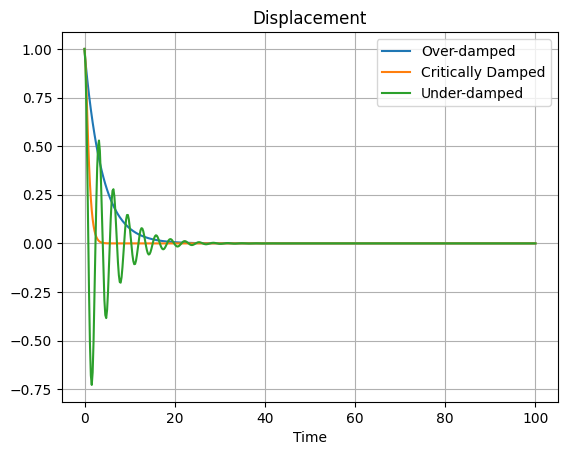

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Inputs
m = 0.25
k = 1.0
F_0 = 0.0
ω = 0.0
u_0 = 1.0
u_dot_0 = 0.0

# Generating time array
t = np.linspace(0, 100, 500)

ω_n = np.sqrt(k/m) # natural Frequency
c_critical = 2 * np.sqrt(m * k)  # Critical Damping

def over_damped(xi):
  r1 = -ω_n * (xi + np.sqrt(xi**2 - 1))
  r2 = -ω_n * (xi - np.sqrt(xi**2 - 1))
  c1 = (u_dot_0 - r2 * u_0) / (r2 - r1)
  c2 = u_0 - c1
  u = c1 * np.exp(r1 * t) + c2 * np.exp(r2 * t)
  plt.plot(t, u, label="Over-damped")

def critically_damped(xi):
  c1 = u_0
  c2 = u_dot_0 + c1 * ω_n
  u = (c1 + c2 * t) * np.exp(-ω_n * t)
  plt.plot(t, u, label="Critically Damped")

def under_damped(xi):
  ω_d = (1 - xi**2) * ω_n
  c1 = u_0
  c2 = (u_dot_0 + c1 * ω_n *xi) / (ω_d)
  u = np.exp(-xi * ω_n * t) * (c1 * np.cos(ω_d * t) + c2 * np.sin(ω_d * t))
  plt.plot(t, u, label="Under-damped")

plt.grid(True)
over_damped(4.0)
critically_damped(1.0)
under_damped(0.1)
plt.xlabel('Time')
plt.title('Displacement')
plt.legend()
plt.show()

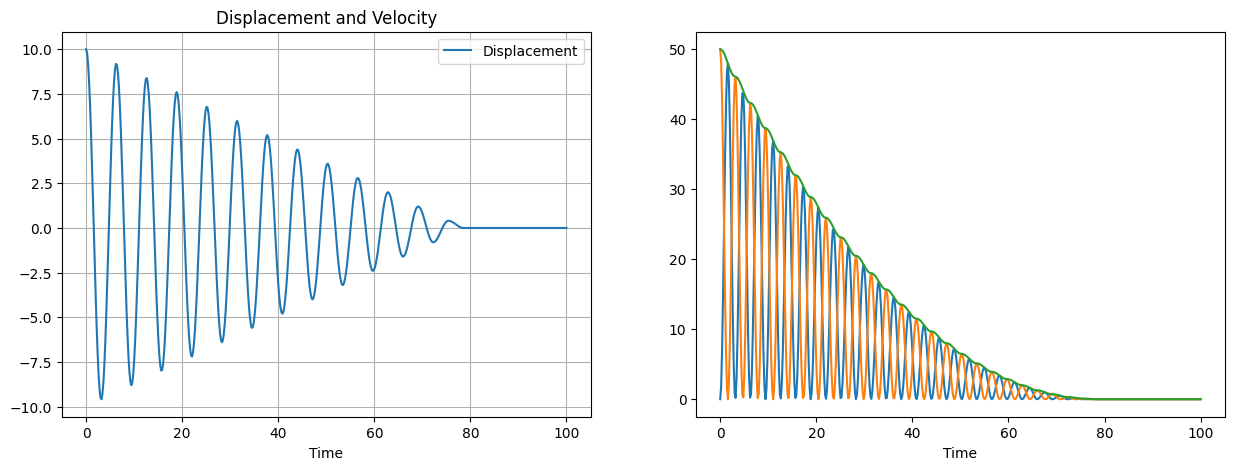

In [ ]:
# COULOMB'S DAMPING

import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Inputs
m = 1.0
k = 1.0
u_0 = 10.0
F = 0.2 # Friction Force

ω_n = np.sqrt(k/m) # Natural Frequency

u = []
u_dot = []

# Generating time array
time = np.linspace(0, 100, 500)

# Displacement and Velocity Functions
for t in time:
  n = int(t * ω_n / pi)
  if (u_0 - (2*n + 1) * F / k) > 0:
    dis = (u_0 - (2*n + 1) * F / k) * np.cos(ω_n * t) + ((-1)**n) * F / k
    vel = -1 * (u_0 - (2*n + 1) * F / k) * np.sin(ω_n * t)
    u.append(dis)
    u_dot.append(vel)
  else:
    u.append(0)
    u_dot.append(0)

KE = []
PE = []
TE = []

# Energy Functions
for i in range(len(time)):
  KE.append(0.5 * m * u_dot[i]**2)
  PE.append(0.5 * k * u[i]**2)
  TE.append(0.5 * m * u_dot[i]**2 + 0.5 * k * u[i]**2)

# Plotting Displacement and Velocity
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(time, u, label="Displacement")
# ax[0].plot(time, u_dot, label="Velocity")
ax[0].set_xlabel('Time')
ax[0].set_title('Displacement and Velocity')
ax[0].grid(True)
ax[0].legend()

# Plotting Energy Functions
ax[1].plot(time, KE, label="Kinetic Energy")
ax[1].plot(time, PE, label="Potential Energy")
ax[1].plot(time, TE, label="Total Energy")
ax[1].set_xlabel('Time')

plt.show()